# Example for a parameter estimation

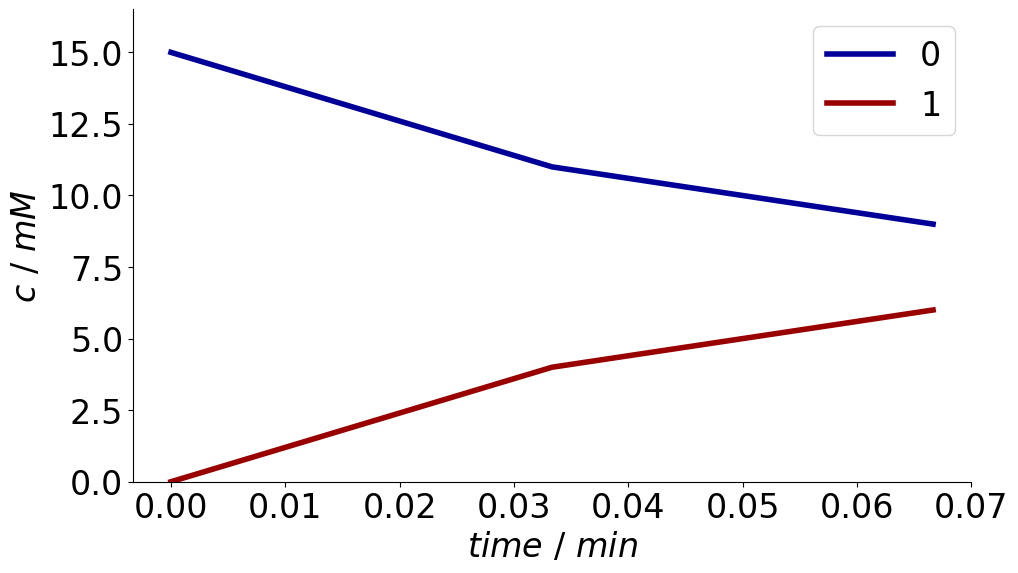

In [1]:
#  https://cadet-process.readthedocs.io/en/latest/user_guide/process_evaluation/comparison.html

from CADETProcess.comparison import Comparator
from CADETProcess.reference import ReferenceIO
import numpy as np

time  = np.array([0,1,2,3,4])
#concentrations = np.array([15, 13.60707976,11.37628152,10.48811636, 9.72366553])
concentrations = np.array([[15, 0], [13, 2], [11,4], [10,5], [9,6]])
comparator = Comparator()


# Step 1 Set up the comparator


reference = ReferenceIO('e experiment', time, concentrations)

_ = reference.plot()

comparator.add_reference(reference)

comparator.add_difference_metric(
    'SSE', reference,"e experiment"
)

# metrices = "shape metric"

In [2]:
from CADETProcess.processModel import ComponentSystem
from CADETProcess.processModel import MassActionLaw

# Step 2 

component_system = ComponentSystem(['A', 'B'])
reaction_system = MassActionLaw(component_system)

reaction_system.add_reaction(
    indices=[0,1], 
    coefficients=[-1, 1],
    k_fwd=0.1,
    k_bwd=0.05,
)

In [9]:
from CADETProcess.processModel import Cstr, FlowSheet
reactor = Cstr(component_system, 'reactor')
reactor.V = 1e-6
reactor.flow_rate=None
# Flow rate 
reactor.bulk_reaction_model = reaction_system
reactor.c = [15.0, 0.0]

flow_sheet = FlowSheet(component_system)
flow_sheet.add_unit(reactor)

from CADETProcess.processModel import Process
process = Process(flow_sheet, 'reaction_demo')
process.cycle_time = 10


In [10]:
import CADETProcess

CADETProcess.__version__

'0.7.2'

In [6]:
from CADETProcess.processModel import Process
process = Process(flow_sheet, 'reaction_demo')
process.cycle_time = 100

In [11]:
print(reactor.flow_rate)
print(process.check_config())

None
True


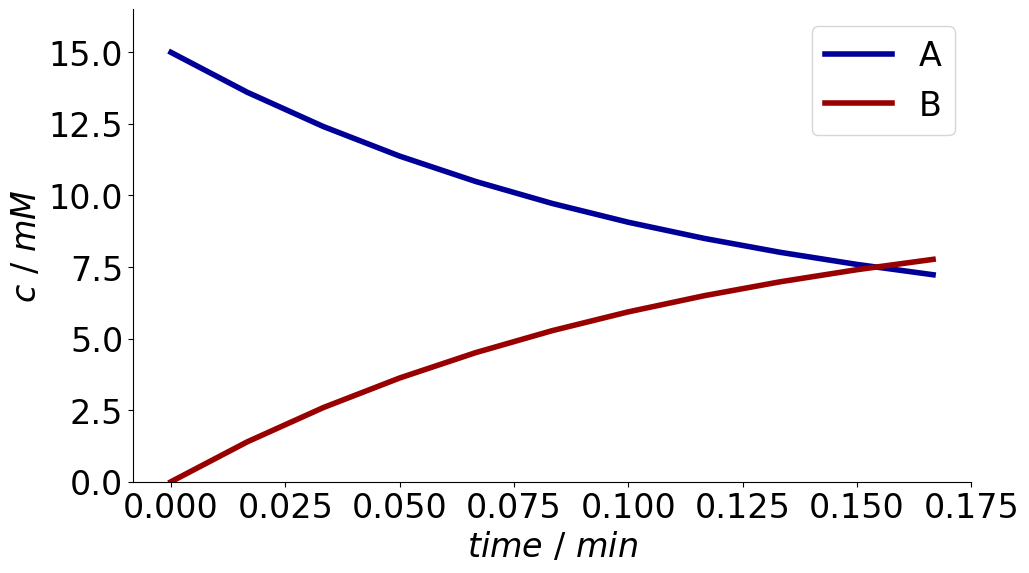

In [12]:
from CADETProcess.simulator import Cadet
simulator = Cadet()
#sim_results = simulator.run(process)
simulation_results = simulator.simulate(process)
#print(dir(sim_results.solution.reactor.outlet))
#print(sim_results.solution.reactor.outlet.solution)
_ = simulation_results.solution.reactor.outlet.plot()

In [9]:
metrics = comparator.evaluate(simulation_results)
#comparator.plot_comparison(simulation_results)

TypeError: 'Dict' object is not callable